<a href="https://colab.research.google.com/github/Maagnitude/coupon-recommend-models/blob/main/coupon_recommend_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Βασική Εργασία** στο μάθημα **Εξόρυξη Δεδομένων**

# **Τμήμα Πληροφορικής και Τηλεματικής - Χαροκόπειο Πανεπιστήμιο**

# **Χαρίτος Δημήτριος ------------------- it21395**
# **Καζάζης Γεώργιος --------------------- it214124**
# **Ζαρρή Σωτηρία Νικολίτσα ------------ it219141**

Στην παρούσα εργασία θα αναπτύξουμε **μοντέλα κατηγοριοποίησης**, για να εξετάσουμε το πρόβλημα του συστήματος **κουπονιών**. Δηλαδή το σε ποιους πιθανούς πελάτες, πρέπει να προσφέρουμε κάποιο κουπόνι, το οποίο πάντα ήταν ένα μεγάλο πρόβλημα, και με τεχνικές **Μηχανικής Μάθησης** θα προσπαθήσουμε να δημιουργήσουμε ένα καλύτερο σύστημα συστάσεων κουπονιών.

Ύστερα θα αναπτύξουμε **μοντέλα συσταδοποίησης**, για να εξετάσουμε και την πλευρά των μοντέλων χωρίς επίβλεψη (**unsupervised**), στην αντιμετώπιση του παρόντος προβλήματος.

**Αρχίζοντας...**

# **Βιβλιοθήκες**
Κάνουμε import τα απαραίτητα **modules**. 
*   Την **pandas** και την **numpy** για την διαχείρηση των δεδομένων μας.

*  Την **matplotlib.pyplot** και την **seaborn** για την οπτικοποίηση των δεδομένων μας. **Ιστογράμματα**, **boxplots** κλπ.

*  Την **missingno** ώστε να οπτικοποιήσουμε το αν υπάρχουν ελλιπείς εγγραφές.

*   Από την **sklearn** κάνουμε import:
      *   Την **linear_model** για να εκπαιδεύσουμε το **Logistic Regression model**.
      *   Την **model selection** για την εισαγωγή του **train_test_split** για το χώρισμα του train και του test sets.
      *  Από το **neighbors**, βάζω το **KNeighborsClassifier** για την ανάπτυξη ενός kNN μοντέλου.
      *  Από το **metrics**, βάζω το **accuracy_score**.
      *  Την **RandomForestClassifier** για να εκπαιδεύσουμε ένα Random Forest model.
*  Το **tensorflow**, και από αυτό, τα **keras** και **layers** για την ανάπτυξη νευρωνικών δικτύων.

*  Τέλος, κάνουμε import τα **warnings** και τα φιλτράρουμε, ώστε να μην εμφανίζονται.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import tensorflow as tf
from tensorflow import keras
from keras import layers

import warnings
warnings.filterwarnings(action='ignore')

## **Φόρτωση του dataset από το csv αρχείο**
Περνάμε το **url** του dataset στην μεταβλητή df με την χρήση της μεθόδου **read_csv**, και εκτυπώνουμε τις 5 πρώτες γραμμές για να δούμε ότι έγιναν όλα σωστά.

Το **url** είναι του **raw dataset** απ το repository μου στο **github**.

In [29]:
url = "https://raw.githubusercontent.com/Maagnitude/coupon_recommend_models/main/in-vehicle-coupon-recommendation.csv"
df = pd.read_csv(url)
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


## **Άλλος τρόπος φόρτωσης (Drive mount)**

In [ ]:
# from google.colab import files
# uploaded = files.upload()
# from google.colab import drive
# drive.mount('/content/drive/')
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/in-vehicle-coupon-recommendation.csv')

## **Σχήμα του Dataframe**. 

Έχουμε ένα **dataframe** σχήματος **12684 x 26**.

**12684 εγγραφές** (δείγματα) και **26 χαρακτηριστικά** (features)

In [32]:
df.shape

(12684, 26)

# **Ελλιπείς εγγραφές**
Με την χρήση του **df.info()**, παρατηρούμε ότι υπάρχουν **ελλιπείς εγγραφές**. Το χαρακτηριστικό **car** έχει μόνο **108 τιμές** που **δεν είναι null**, από τις **12684**. Το καλύτερο εδώ είναι να **πετάξουμε** αυτό το χαρακτηριστικό μιας και δεν μας προσφέρει κάτι. Ύστερα με την χρήση του **df.isnull().sum()**, θα δούμε ακριβώς πόσες τιμές είναι **null** σε κάθε χαρακτηριστικό. Επίσης οπτικοποιούμε τις ελλιπείς εγγραφές με την χρήση της βιβλιοθήκης **missingno**.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [35]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

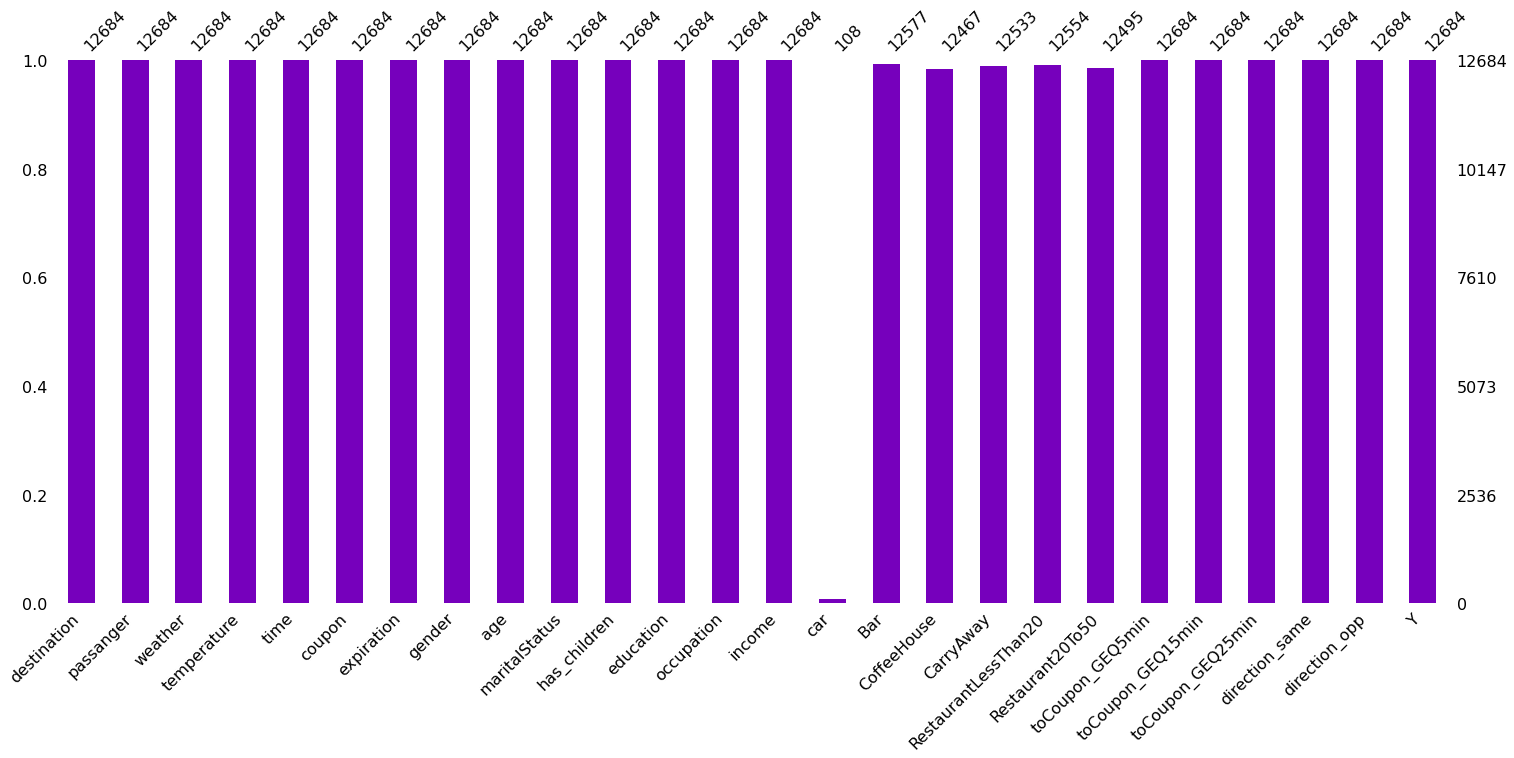

In [36]:
null_plot = msno.bar(df, color="#7600BC")

In [37]:
df= df.drop("car", axis='columns')

# **Imputing**
Εδώ ελέγχουμε τον αριθμό των τιμών για κάθε κατηγορική τιμή. Φαίνεται σαν μια καλή στρατηγική για κάθε τιμή null, να την γεμίζουμε με την τιμή που εμφανίστηκε **πιο συχνά** στις υπόλοιπες εγγραφές (**impute**). 

Ύστερα ελέγχουμε να δούμε ότι δεν υπάρχουν καθόλου null τιμές στις εγγραφές μας με την χρήση της **df.isnull().sum()**.

In [38]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Bar'] = imputer.fit_transform(df['Bar'].values.reshape(-1,1))[:,0]

In [39]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['CoffeeHouse'] = imputer.fit_transform(df['CoffeeHouse'].values.reshape(-1,1))[:,0]

In [40]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['CarryAway'] = imputer.fit_transform(df['CarryAway'].values.reshape(-1,1))[:,0]

In [41]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['RestaurantLessThan20'] = imputer.fit_transform(df['RestaurantLessThan20'].values.reshape(-1,1))[:,0]

In [42]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Restaurant20To50'] = imputer.fit_transform(df['Restaurant20To50'].values.reshape(-1,1))[:,0]

In [43]:
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

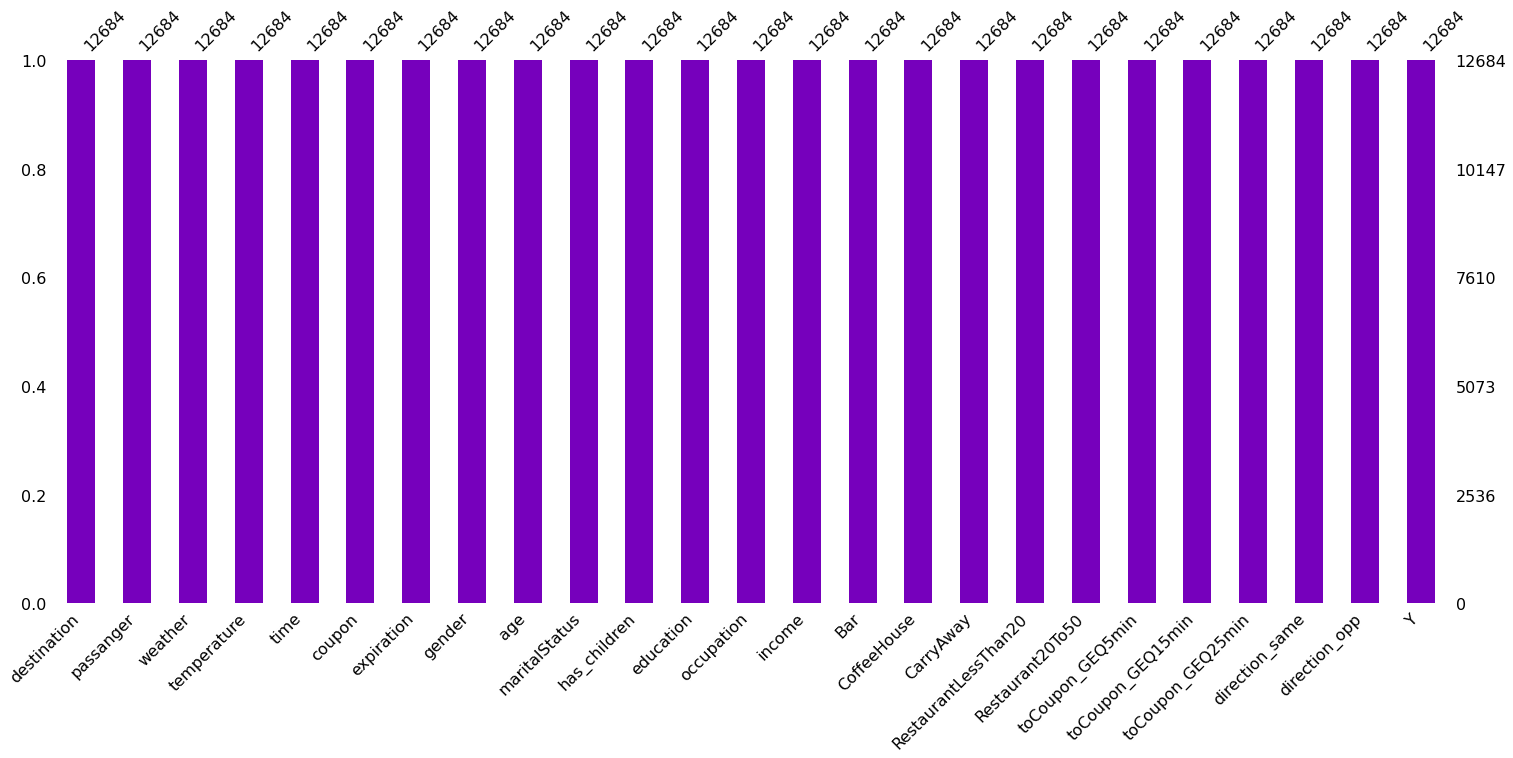

In [44]:
new_null_plot = msno.bar(df, color="#7600BC")

# **Μοναδικές τιμές**
Ελέγχουμε τις μοναδικές (**διαφορετικές**) τιμές που μπορούν να λάβουν τα ποσοτικά χαρακτηριστικά μας, με την χρήση της **nunique()**, και παρατηρούμε ότι το χαρακτηριστικό "**toCoupon_GEQ5min**" παίρνει μόνο μία τιμή, οπότε δεν το χρειαζόμαστε, και θα το πετάξουμε.

In [45]:
df.select_dtypes('int64').nunique()

temperature          3
has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
dtype: int64

In [46]:
df.drop(columns=['toCoupon_GEQ5min'], inplace=True)

Επίσης τυπώνοντας τον αριθμό της κάθε τιμής που λαμβάνει το "**direction_opp**" και το "**direction_same**", παρατηρούμε ότι εκεί που το ένα παίρνει **0**, το άλλο παίρνει **1**, και το αντίθετο (όπως άλλωστε καταλαβαίνουμε και από την ονομασία του χαρακτηριστικού). Οπότε μας φτάνει να κρατήσουμε το ένα (**direction_same**), γιατί το άλλο είναι **άχρηστη πληροφορία**.

In [47]:
df['direction_same'].value_counts()

0    9960
1    2724
Name: direction_same, dtype: int64

In [48]:
df['direction_opp'].value_counts()

1    9960
0    2724
Name: direction_opp, dtype: int64

In [49]:
df.drop(columns=['direction_opp'], inplace=True)

## **Διπλότυπες Εγγραφές**
Ύστερα πετάμε τις **διπλότυπες εγγραφές** (**drop duplicates**) γιατί και δεν μας προσφέρουν κάτι, και μπορεί να **υπερεκπαιδευτούν** (**overfitting**) τα μοντέλα μας.

In [25]:
df.shape

(12684, 23)

In [26]:
df.drop_duplicates(inplace=True)
df.shape

(12610, 23)

# **Ιστόγραμμα**
Κάνουμε plot το ιστόγραμμα κάθε χαρακτηριστικού ξεχωριστά.

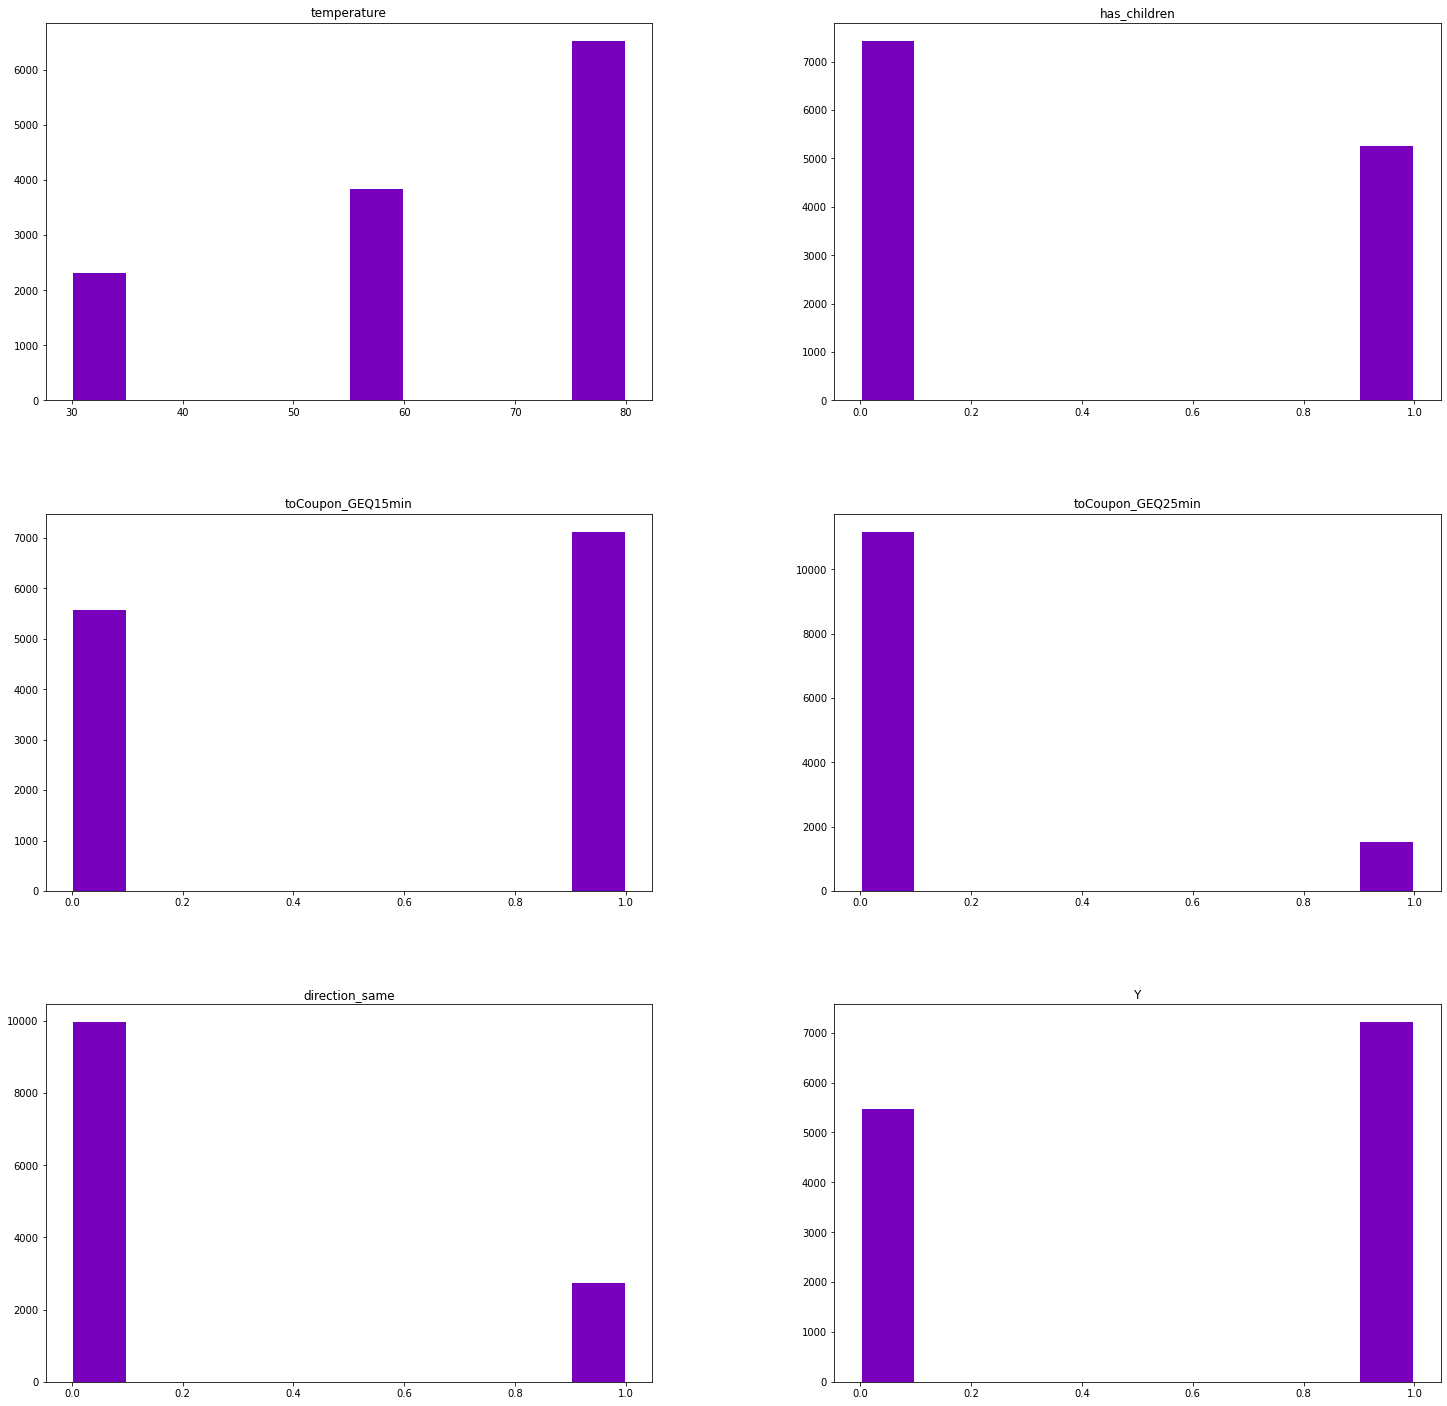

In [50]:
df_histplot = df.hist(grid=False, figsize=(25,25), color='#7600BC', zorder=2, rwidth=0.95)

# **ONE-HOT ENCODING**

Here we can see the data type of each attribute. Temperature has only **three** numerical values, so we will cast it as **categorical** in order to one-hot encode it later.

In [14]:
df.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [ ]:
df['temperature'].value_counts()

80    6528
55    3840
30    2316
Name: temperature, dtype: int64

In [ ]:
df['temperature']=pd.Categorical(df.temperature)

In [ ]:
df

Numerical-value attributes are already in one-hot encoded form (0s and 1s), so we won't mess with them. 

In [ ]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

In [ ]:
df_categorical=df.select_dtypes(exclude='number')

In [ ]:
df_categorical

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3


In [ ]:
for value in df_categorical:
  df= pd.get_dummies(df,columns=[value])

In [ ]:
df

,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,destination_Home,destination_No Urgent Place,destination_Work,...,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,1,1,0,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
1,1,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
2,1,1,1,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
3,1,1,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,1,1,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,1,0,0,1,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
12680,0,1,0,0,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
12681,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
12682,0,1,1,1,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
df.shape

(12684, 112)

## **Dropping Duplicate Values**

We can see that 'toCoupon_GEQ5min' gets only one value. So we don't need that. 

## direction_opp has opposite values from direction_same

In [ ]:
df.describe()

,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),...,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
count,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,...,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000
mean,0.414512,0.559794,0.116019,0.215543,0.567565,0.256146,0.496907,0.246947,0.574782,0.261063,...,0.434972,0.281761,0.101665,0.164235,0.017367,0.259001,0.057732,0.020936,0.494052,0.168279
std,0.492657,0.496432,0.320260,0.411215,0.495434,0.436521,0.500010,0.431253,0.494396,0.439231,...,0.495773,0.449875,0.302220,0.370503,0.130640,0.438103,0.233245,0.143175,0.499984,0.374129
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.dtypes

has_children              int64
toCoupon_GEQ15min         int64
toCoupon_GEQ25min         int64
direction_same            int64
Y                         int64
                          ...  
Restaurant20To50_1~3      uint8
Restaurant20To50_4~8      uint8
Restaurant20To50_gt8      uint8
Restaurant20To50_less1    uint8
Restaurant20To50_never    uint8
Length: 110, dtype: object

In [ ]:
cluster_df = df.copy()

#**Classification (Logistic Regression)**

In [ ]:
X = df.drop('Y', axis=1)

In [ ]:
y = df['Y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [ ]:
lr = linear_model.LogisticRegression()
lr_mod = lr.fit(X_train, y_train)

In [ ]:
#Predict the response for test dataset
y_pred_Lr = lr_mod.predict(X_test)

log_accuracy = accuracy_score(y_test, y_pred_Lr)

print(f'Accuracy: {log_accuracy:.3f}')

Accuracy: 0.691


# **Classification (KNN Algorithm)**

Με scale μας βγήκε 0.03 λιγότερο.

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 30, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
knn_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {knn_accuracy:.3f}')

Accuracy: 0.712


# **SVM Algorithm**

Αργεί πάρα πολύ η εκπαίδευση του.

In [ ]:
SVM = SVC(kernel="rbf", random_state=None, probability=True, cache_size=200, gamma=0.1)
SVM.fit(X_train, y_train)

SVC(gamma=0.1, probability=True)

In [ ]:
y_pred_SVM = SVM.predict(X_test)
SVM_accuracy = accuracy_score(y_test, y_pred_SVM)

print(f'Accuracy: {SVM_accuracy:.3f}')

Accuracy: 0.750


# **Decision Tree**

In [ ]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_DTC = DTC.predict(X_test)

DTC_accuracy = accuracy_score(y_test, y_pred_DTC)

print(f'Accuracy: {DTC_accuracy:.3f}')

Accuracy: 0.680


# **Random Forest**

In [ ]:
randForest =  RandomForestClassifier()
randForest.fit(X_train, y_train)

importances = randForest.feature_importances_

# sort the feature importances
indices = np.argsort(importances)[::-1]

# select the top 5 features
selected_features = indices[:5]

#Predict the response for test dataset
y_pred_randForest = randForest.predict(X_test)

rnf_accuracy = accuracy_score(y_test, y_pred_randForest)

print(f'Accuracy: {rnf_accuracy:.3f}')

Accuracy: 0.750


In [ ]:
selected_features = selected_features.tolist()

In [ ]:
print(selected_features)

[23, 26, 24, 93, 22]


In [ ]:
df_new = df.iloc[:, selected_features]

In [ ]:
df_new = pd.concat([df_new, df['Y']], axis=1)

In [ ]:
df_new

,coupon_Bar,coupon_Restaurant(20-50),coupon_Carry out & Take away,CoffeeHouse_less1,time_7AM,Y
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,0,0,1,0,0,1
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
12679,0,0,1,0,0,1
12680,0,0,1,0,1,1
12681,0,0,0,0,1,0
12682,1,0,0,0,1,0


In [ ]:
newX = df_new.drop('Y', axis=1)
newy = df_new['Y']
newX_train, newX_test, newy_train, newy_test = train_test_split(newX, newy, train_size=0.7, random_state=42)

In [ ]:
randForest =  RandomForestClassifier()
randForest.fit(newX_train, newy_train)

#Predict the response for test dataset
newy_pred_randForest = randForest.predict(newX_test)

new_rnf_accuracy = accuracy_score(newy_test, newy_pred_randForest)

print(f'Accuracy: {new_rnf_accuracy:.3f}')

Accuracy: 0.609


# **Naive Bayes**

In [ ]:
bayes =  GaussianNB()
bayes.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_bayes = bayes.predict(X_test)

bayes_accuracy = accuracy_score(y_test, y_pred_bayes)

print(f'Accuracy: {bayes_accuracy:.3f}')


Accuracy: 0.637


In [ ]:
def NeuralN(X_train, X_test, y_train, y_test):

  model = keras.Sequential([
      layers.Input(shape=(X_train.shape[1],), name='input'),
      layers.Dense(100, activation='relu'),
      layers.Dense(100, activation='relu'),
      layers.Dense(100, activation='relu'),
      layers.Dense(100, activation='relu'),
      layers.Dense(3, activation='softmax', name='output')      
  ])

  model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
  )
  model.summary()
  history = model.fit(X_train, y_train, epochs=30, batch_size = 128)
  accuracy = model.evaluate(X_test, y_test)

  y_test_c = tf.keras.utils.to_categorical(y_test)

  y_pred = model.predict(X_test)
  pred_idx = np.argmax(y_pred, axis=1)
  true_idx = np.argmax(y_test_c, axis=1)
  tf_confmatrix = tf.math.confusion_matrix(true_idx, pred_idx)

  return accuracy, tf_confmatrix

In [ ]:
nn_accuracy, tf_confmatrix = NeuralN(X_train, X_test, y_train, y_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               11000     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 output (Dense)              (None, 3)                 303       
                                                                 
Total params: 41,603
Trainable params: 41,603
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
69/69 [==============================] 

In [ ]:
print(f'Accuracy: {nn_accuracy[1]:.3f}')

Accuracy: 0.732


In [ ]:
def heat_confmatrix (confmatrix):
  
  labels = ['Accept', 'NotAccept']

  # Δίνουμε τα labels στον πίνακα
  conf_matr_plt = pd.DataFrame(confmatrix, index = labels, columns = labels)
  
  plt.subplots(figsize=(7, 5))
  
  ax = sns.heatmap(conf_matr_plt, cmap='viridis', annot=True, annot_kws={'size':20}, fmt="d")

  ax.xaxis.tick_top()
  ax.set_title("Confusion Matrix\n")
  plt.ylabel('True')
  plt.xlabel('Predicted')
  plt.show()

In [ ]:
tf_confmatrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1122,  532],
       [ 481, 1648]], dtype=int32)>

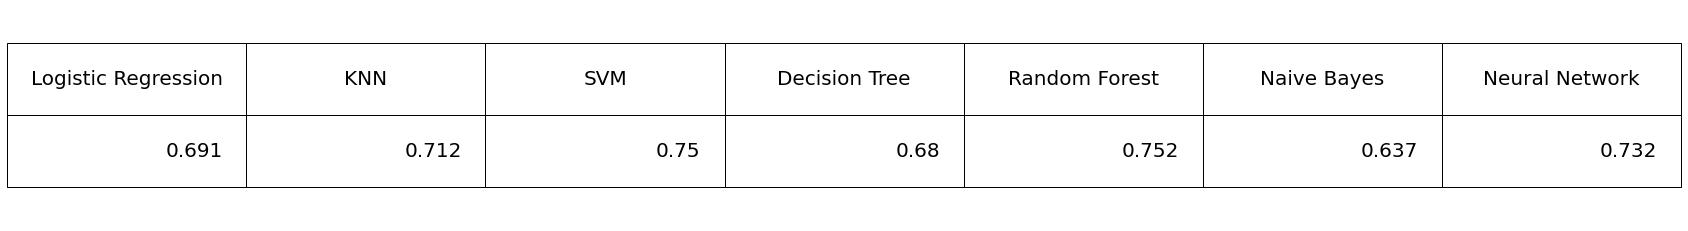

In [ ]:
labels = ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree',
          'Random Forest', 'Naive Bayes', 'Neural Network']

data = [[log_accuracy, knn_accuracy, SVM_accuracy, DTC_accuracy, rnf_accuracy, bayes_accuracy, nn_accuracy[1]]]

data = np.array(data)
data = np.round(data, 3)
fig, ax = plt.subplots()
table = ax.table(cellText=data, colLabels=labels, loc='center')
table.set_fontsize(60)
table.scale(5,6)
ax.axis('off')
ax.grid(False)

plt.show()

# 2) Επιλογή 5 γνωρισμάτων.
Αρχικά σκεφτήκαμε να δούμε τα γνωρίσματα τα οποία βγάζουν περισσότερο νοήμα σε εμας για να αποτελέσουν κριτήριο επιλογής κουπονιού. Ελέγξαμε το sec_df.groupby("")["Y"].mean() του κάθε γνωρίσματος για να δούμε πόσο διαφοροποιούνται οι μέσοι όροι των τιμών τους. Επειδή όμως με αυτό τον τρόπο ελέγχουμε μονομερώς το κάθε γνώρισμα αν παίρνει ή όχι το κουπόνι χωρίς να ελέγχουμε τα υπόλοιπα γνωρίσματα αποφασίσαμε να επιλέξουμε 5 γνωρίσματα σύμφωνα με κάποια δικά μας κριτήρια και να δούμε ποιος συνδιασμός επιτυγχάνει το μεγαλύτερο αποτέλεσμα.

In [ ]:
sec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [ ]:
sec_df.drop(columns=['toCoupon_GEQ5min', 'car', 'direction_opp'], inplace=True)

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
sec_df['Bar'] = imputer.fit_transform(sec_df['Bar'].values.reshape(-1,1))[:,0]

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
sec_df['CoffeeHouse'] = imputer.fit_transform(sec_df['CoffeeHouse'].values.reshape(-1,1))[:,0]

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
sec_df['CarryAway'] = imputer.fit_transform(sec_df['CarryAway'].values.reshape(-1,1))[:,0]

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
sec_df['RestaurantLessThan20'] = imputer.fit_transform(sec_df['RestaurantLessThan20'].values.reshape(-1,1))[:,0]

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
sec_df['Restaurant20To50'] = imputer.fit_transform(sec_df['Restaurant20To50'].values.reshape(-1,1))[:,0]

In [ ]:
sec_df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
Y                       0
dtype: int64

In [ ]:
secX = sec_df.drop('Y', axis=1)
secy = sec_df['Y']
secX_train, secX_test, secy_train, secy_test = train_test_split(secX, secy, train_size=0.7, random_state=42)

In [ ]:
df_corr = sec_df.corr()

In [ ]:
sec_df['toCoupon_GEQ5min'].value_counts()

1    12684
Name: toCoupon_GEQ5min, dtype: int64

In [ ]:
df_corr['Y']

temperature          0.061240
has_children        -0.045557
toCoupon_GEQ5min          NaN
toCoupon_GEQ15min   -0.081602
toCoupon_GEQ25min   -0.103633
direction_same       0.014570
direction_opp       -0.014570
Y                    1.000000
Name: Y, dtype: float64

In [ ]:
sec_df.groupby("has_children")["Y"].mean()

has_children
0    0.587404
1    0.541595
Name: Y, dtype: float64

In [ ]:
sec_df["has_children"].value_counts()

0    7431
1    5253
Name: has_children, dtype: int64

In [ ]:
sec_df = sec_df[["destination", "expiration", "education", "income", "toCoupon_GEQ25min", "Y"]]

In [ ]:
sec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   destination        12684 non-null  object
 1   expiration         12684 non-null  object
 2   education          12684 non-null  object
 3   income             12684 non-null  object
 4   toCoupon_GEQ25min  12684 non-null  int64 
 5   Y                  12684 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 594.7+ KB


In [ ]:
sec_df.isnull().sum()

destination          0
expiration           0
education            0
income               0
toCoupon_GEQ25min    0
Y                    0
dtype: int64

No need to impute values for these 5 categories

# One-hot Encoding

In [ ]:
sec_df.dtypes

destination          object
expiration           object
education            object
income               object
toCoupon_GEQ25min     int64
Y                     int64
dtype: object

In [ ]:
sec_df.columns

Index(['destination', 'expiration', 'education', 'income', 'toCoupon_GEQ25min',
       'Y'],
      dtype='object')

In [ ]:
secdf_categorical=sec_df.select_dtypes(exclude='number')
secdf_categorical

,destination,expiration,education,income
0,No Urgent Place,1d,Some college - no degree,$37500 - $49999
1,No Urgent Place,2h,Some college - no degree,$37500 - $49999
2,No Urgent Place,2h,Some college - no degree,$37500 - $49999
3,No Urgent Place,2h,Some college - no degree,$37500 - $49999
4,No Urgent Place,1d,Some college - no degree,$37500 - $49999
...,...,...,...,...
12679,Home,1d,Bachelors degree,$75000 - $87499
12680,Work,1d,Bachelors degree,$75000 - $87499
12681,Work,1d,Bachelors degree,$75000 - $87499
12682,Work,1d,Bachelors degree,$75000 - $87499


In [ ]:
for value in secdf_categorical:
  sec_df= pd.get_dummies(sec_df,columns=[value])

In [ ]:
sec_df

,toCoupon_GEQ25min,Y,destination_Home,destination_No Urgent Place,destination_Work,expiration_1d,expiration_2h,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),...,education_Some college - no degree,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500
0,0,1,0,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,1,0,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
12680,0,1,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
12681,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
12682,1,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
sec_df.shape

(12684, 22)

In [ ]:
sec_df.select_dtypes('int64').nunique()

toCoupon_GEQ25min    2
Y                    2
dtype: int64

# Split dataset

In [ ]:
sec_X = sec_df.drop('Y', axis=1)

In [ ]:
sec_y = sec_df['Y']

In [ ]:
SX_train, SX_test, Sy_train, Sy_test = train_test_split(sec_X, sec_y, train_size=0.7, random_state=42)

# Random Forest
best algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randForest = RandomForestClassifier()

randForest.fit(SX_train, Sy_train)
Saccuracy = randForest.score(SX_test, Sy_test)
print(f'Accuracy: {Saccuracy:.2f}')  

Accuracy: 0.62


# Clustering

In [ ]:
cluster_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [ ]:
cluster_df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [ ]:
cluster_df.drop_duplicates(inplace=True)

In [ ]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12610 non-null

## One-hot Encoding in cluster_df

In [ ]:
cluster_df.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [ ]:
cluster_df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

In [ ]:
cluster_categorical = cluster_df.select_dtypes(exclude='number')
cluster_categorical

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,No Urgent Place,Alone,Sunny,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3
1,No Urgent Place,Friend(s),Sunny,10AM,Coffee House,2h,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3
2,No Urgent Place,Friend(s),Sunny,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3
3,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,2h,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3
4,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,1d,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,6PM,Carry out & Take away,1d,Male,26,Single,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3
12680,Work,Alone,Rainy,7AM,Carry out & Take away,1d,Male,26,Single,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3
12681,Work,Alone,Snowy,7AM,Coffee House,1d,Male,26,Single,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3
12682,Work,Alone,Snowy,7AM,Bar,1d,Male,26,Single,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3


In [ ]:
for value in cluster_categorical:
  cluster_df= pd.get_dummies(cluster_df,columns=[value])

In [ ]:
cluster_df

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,destination_Home,destination_No Urgent Place,...,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,55,1,1,0,0,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,0
1,80,1,1,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2,80,1,1,1,0,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,0
3,80,1,1,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,80,1,1,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,55,0,1,0,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,0
12680,55,0,1,0,0,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
12681,30,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
12682,30,0,1,1,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
cluster_df.select_dtypes('int64').nunique()

temperature          3
has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
dtype: int64

In [ ]:
# cluster_df = cluster_df[["temperature", "has_children"]]

In [ ]:
cluster_df.shape

(12610, 110)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_cluster_df = scaler.fit_transform(cluster_df)

In case you have too many columns, you can use feature selection techniques like PCA(Principal component analysis) to reduce dimensionality of the data. You can also specify the number of components you want to keep. It's important to note that, PCA is an unsupervised technique and it will not take into account the labels of the data but it can be used to reduce the dimensionality of the data and make the clustering process more computationally efficient.

Also, the results of PCA are sensitive to the scaling of the data so it's recommended to use StandardScaler() before applying PCA and k-means.

In [ ]:
from sklearn.decomposition import PCA

# Create a PCA object with the desired number of components
pca = PCA(n_components=2)

# Fit and transform the data using the PCA object
cluster_df_pca = pca.fit_transform(scaled_cluster_df)


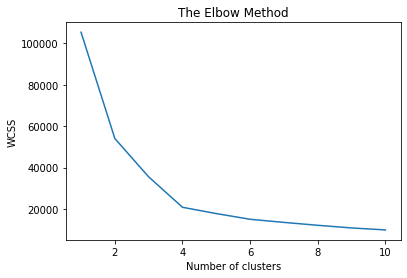

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(cluster_df_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(cluster_df_pca)

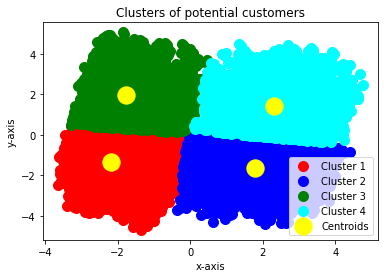

In [ ]:
plt.scatter(cluster_df_pca[y_kmeans == 0, 0], cluster_df_pca[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(cluster_df_pca[y_kmeans == 1, 0], cluster_df_pca[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(cluster_df_pca[y_kmeans == 2, 0], cluster_df_pca[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(cluster_df_pca[y_kmeans == 3, 0], cluster_df_pca[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of potential customers')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Predict the cluster labels for each data point
cluster_labels = kmeans.predict(cluster_df_pca)

# Compute the silhouette score
score = silhouette_score(cluster_df_pca, cluster_labels)

# Print the silhouette score
print("Silhouette score: {:.3f}".format(score))


Silhouette score: 0.478
